# Caractéristiques des moteurs d'avion à pistons
***

## Objectif:

   Dans ce projet nous allons analyser un ensemble de données des caractéristiques des moteurs d'avions et en tirer des conclusions. Nous allons nous concentrer uniquement sur le moteur à piston (Les données des autre feuilles types moteur d'avion à réaction ou moteur de fuséee ne sont pas assez enrichi).

## Déroulé du projet: 

   1) Dans un premier temps nous allons comprendre le sujet etablir les notions et definir notre plan de deroulement du projet.
   2) Dans un second temps nous allons réorginer le fichier excel et le convertir en unité international.
   3) Enfin Dans un troisiéme temps nous annalyserons le fichier a l'aide de graphique ou d'outil d'analyse pour en tirez des conclusion.



# Partie 1: Compréhension du sujet:
***
Les moteurs d'avions sont des éléments clés de tout avion. Ils sont responsables de fournir la poussée nécessaire pour propulser l'avion dans les airs et le maintenir en mouvement. Voici un résumé des différents types de moteurs d'avions :
Le moteur à piston utilisé en aéronautique est le plus souvent un moteur thermique à quatre temps nous qllons nous intér2sse a ceux la

 Voici un exemple d'un moteru piston 4 temps:
 
 ![Moteur 4 temps cycle](cycle-image-4-temps.png)
 
 
 Les avions sont donc constitué de ce type de moteur mais avec plusieur cylindres disposé en plusieur configurations differente:
  tel que les moteurs d'avion en etoile :
  
  ![Texte alternatif de l'image](chemin/vers/l'image.png)
  
  le moteur en v : 
  
  ![Texte alternatif de l'image](chemin/vers/l'image.png)
  
  et plein d'autre: 
  
  
  
  Enfin pour comprendre parfatiement le sujet il faut comprendre quelles sont les caracteristique clé qui influe sur la performance d'un moteur davions , il faut qi'l soit leger et puissant nous allons donc decrire toute les caracteristique du fichier importer :
  et supprimer ons celle qui ne seront pa sutile :
  
  
-[x]Tâche accomplie   
-[ ]Tâche en cours      
-[ ]Autre tâche à faire
  
  
  
  

# Partie 2: Imporation du fichier et rorganisation:
***
   Avant toute chose nous avons du installer nos interpreteur python et nos terminal a l'aide de gitbash, enfin nous avons crée     un repository sur github pour travailler en collaborations voici le liens:   [Projet_L2_Info](https://github.com/Paulciapello/Projet_Info_L2.git)
    
   Nous avons decidez d'utiliser l'interpreter jupyter pour sa simpliciter et la possibilité de crée un rapport en lui meme. 


#### Import du fichier:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt    # importations des modules utiles pour ce projet.
import numpy as np

df = pd.read_excel('Engine.xls')

#### Ajout, suppression, renommage et réorganisation des colonnes, lignes

In [2]:
df = df.set_axis(df.iloc[2], axis='columns')      # mise en place de l'en-tête
df.drop([2],inplace=True)  

df.columns.values[11] = 'Cylindrées_cm^3'   
df.columns.values[13] = 'Nb_Cylindres'     
df.columns.values[15] = 'Config_Moteurs'   # renommage des noms de colonnes doublé 

##### Supression colonnes, lignes:

In [3]:
df.drop(df.columns[27:], axis=1, inplace=True) # suppression des colonnes vides

In [4]:
# suppression des colonnes inutiles
df.drop(['Manufacturer', 'Ordered', 'Delivered',
         'Modified','Cancelled', 'Test','Manufacturer Model',
         'Rows','IN^3','Number','Exhaust','Intake','Arrangement','Gear Ratio'], axis=1, inplace=True)  

In [5]:
df.dropna(thresh=3, inplace=True)    # Supression de ligne si il y a moins de 3 valeurs non vide 

##### Renommages colonnes

In [6]:
df.rename(columns = {'Type' : 'Nom_moteur',
                    'Bore' : 'Alesage_mm',
                    'Stroke' : 'Course_Piston_mm',
                     'Cooling' : 'Refroidissement',
                     'CR' : 'Taux de compression',
                     'Weight' : 'Poids_Moteurs_kg',
                     'HP' : 'Puissance_Moteurs_kwatt',
                     '@ RPM' : 'Tours_minutes',
                     'Aircraft' : 'Aéronef',
                      }, inplace=True)

#### Reorganisation colonnes

In [7]:
reorga_colonnes = ['Nom_moteur','Aéronef','Puissance_Moteurs_kwatt',
                   'Poids_Moteurs_kg','Cylindrées_cm^3',
                   'Taux de compression','Alesage_mm',
                   'Course_Piston_mm','Tours_minutes',
                   'Config_Moteurs','Nb_Cylindres','Refroidissement'
                  ]
df = df[reorga_colonnes]    

### Conversion données

##### Création de fonctions de convertions

In [8]:
def inch_to_mm(inch):
    """ 
    convertion pouce en mm 
    """
    return inch * 25.4

def in3_to_cm3(in3):
    """ 
    convertion poucecube en cmcube
    """
    return in3 * 16.39

def lbs_to_kg(lbs):
    """ 
    convertion livre en kg
    """
    return lbs * 0.45359237

def ch_to_kwatt(ch):
    """ 
    convertion chevaux en kwatt
    """
    return ch * 0.735499



##### Convertion colonnes en float

In [9]:
# variable des colonnes que l'on veux convertir en float
cols_to_convert = ['Puissance_Moteurs_kwatt','Alesage_mm','Course_Piston_mm',
                   'Poids_Moteurs_kg','Cylindrées_cm^3','Taux de compression',
                  'Tours_minutes','Nb_Cylindres']

#Pour convertir les colonnes contenant des str en float (utilisation de chat gpt pour la fonction applymap(...)
df[cols_to_convert] = df[cols_to_convert].applymap(lambda x: float(x) if str(x).replace('.','',1).isdigit() else None)
df[cols_to_convert] = df[cols_to_convert].astype(float) #convertion en float

##### Convertions colonnes en unité international

In [10]:
cols_to_inch_to_mm = ['Alesage_mm','Course_Piston_mm']

# Convertion des colonnes en unitées internationales
df[cols_to_inch_to_mm] = df[cols_to_inch_to_mm].apply(inch_to_mm)
df['Poids_Moteurs_kg'] = df['Poids_Moteurs_kg'].apply(lbs_to_kg)
df['Puissance_Moteurs_kwatt'] = df['Puissance_Moteurs_kwatt'].apply(ch_to_kwatt)
df['Cylindrées_cm^3'] = df['Cylindrées_cm^3'].apply(in3_to_cm3)

df.head()

2,Nom_moteur,Aéronef,Puissance_Moteurs_kwatt,Poids_Moteurs_kg,Cylindrées_cm^3,Taux de compression,Alesage_mm,Course_Piston_mm,Tours_minutes,Config_Moteurs,Nb_Cylindres,Refroidissement
5,NaN,NaN,257.424650,319.782621,19003.756581,NaN,120.0,140.0,2000.0,Y,12.0,L
6,Dragonfly I,(Clark Pursuit),235.359680,297.556595,22779.809086,4.42,139.7,165.1,1650.0,R,9.0,A
7,Dragonfly IA,Dragon,264.779640,NaN,22779.809086,4.42,139.7,165.1,NaN,R,9.0,A
8,Gnat,Martin K.III,33.097455,37.194574,2281.204907,3.80,110.0,120.0,1920.0,O,2.0,A
9,Mosquito,NaN,91.937375,81.646627,5104.431641,4.05,95.0,120.0,1700.0,R,6.0,A


Nous avons donc réorganiser les colonnes avec les unités qu'il convient d'avoir et supprimer les colonne inutile ou avec trop peux de donner.
Par la suite nous pouvons donc analyser c'est donner pour en tirer des conclusions.

pour commencer nous allons utiliser la fonction describe pour decrire sur une vu d'ensmelbe les données

In [11]:
df.describe()

2,Puissance_Moteurs_kwatt,Poids_Moteurs_kg,Cylindrées_cm^3,Taux de compression,Alesage_mm,Course_Piston_mm,Tours_minutes,Nb_Cylindres
count,1537.000000,247.000000,772.000000,217.000000,733.000000,732.000000,326.000000,767.000000
mean,612.316914,328.552747,19028.513094,5.113461,125.837217,149.879154,1617.193252,9.576271
std,635.304740,163.035550,15305.892566,0.491518,19.447658,28.512721,386.169380,4.868142
min,4.412994,37.194574,0.000000,3.750000,57.150000,53.848000,900.000000,1.000000
25%,154.454790,223.167446,9010.873129,4.760000,114.300000,130.175000,1400.000000,6.000000
50%,367.749500,290.072321,15894.790079,5.100000,127.000000,152.400000,1600.000000,9.000000
75%,882.598800,408.233133,26917.935912,5.420000,139.700000,170.000000,1800.000000,12.000000
max,3677.495000,1016.046909,153236.333891,6.555000,219.075000,228.600000,6000.000000,42.000000


Sur toute les valeurs numérique nous avons de nombreuse informations 

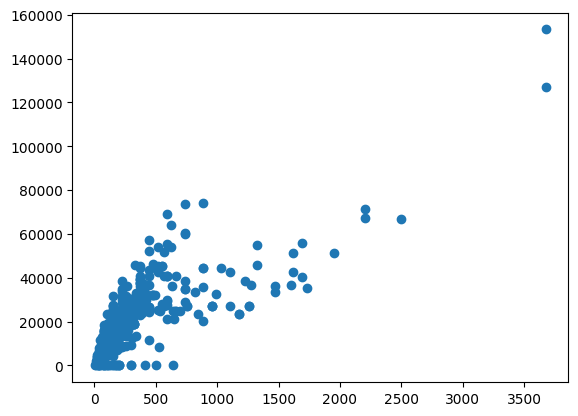

In [12]:
plt.scatter(df['Puissance_Moteurs_kwatt'],df['Cylindrées_cm^3'])

In [13]:


df_L = df[df['Refroidissement'] == 'L']
df_A = df[df['Refroidissement'] == 'A']

df_L_x = df_L.loc[:, ['Puissance_Moteurs_kwatt', 'Poids_Moteurs_kg','Alesage_mm','Course_Piston_mm']]
df_A_x = df_A.loc[:, ['Puissance_Moteurs_kwatt', 'Poids_Moteurs_kg','Alesage_mm','Course_Piston_mm']]
Moyennes_L = df_L_x.mean(numeric_only=True).tolist()
Moyennes_A = df_A_x.mean(numeric_only=True).tolist()

Moyennes_L = list(map(int, Moyennes_L))
Moyennes_A = list(map(int, Moyennes_A))


print(Moyennes_L)
print(Moyennes_A)

[326, 377, 130, 159]
[196, 191, 118, 134]


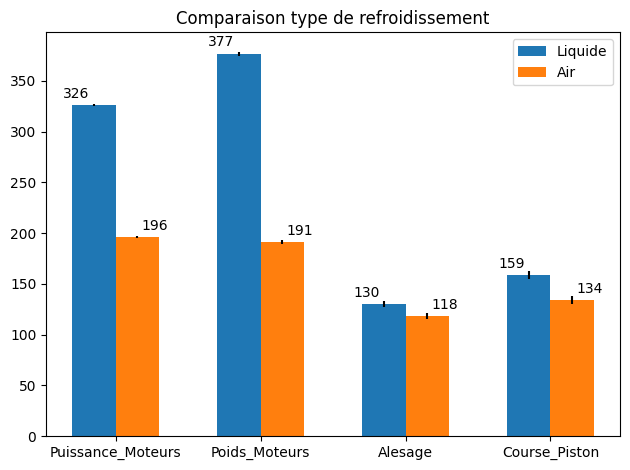

In [14]:
 men_std = (1,2,3,4)
women_std = (1,2,3,4)

ind = np.arange(len(Moyennes_L))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, Moyennes_L ,width, yerr=men_std,
                label='Liquide')
rects2 = ax.bar(ind + width/2, Moyennes_A, width, yerr=women_std,
                label='Air')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Comparaison type de refroidissement')
ax.set_xticks(ind)
ax.set_xticklabels(('Puissance_Moteurs','Poids_Moteurs','Alesage','Course_Piston'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

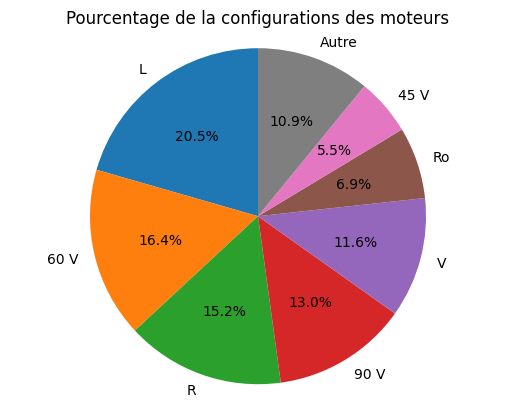

In [15]:
# extraire les données de la colonne du dataframe
counts = df['Config_Moteurs'].value_counts()
total = counts.sum()
labels = counts.index.tolist()

# définir les seuils pour les valeurs à remplacer
threshold = 0.03
others = counts[counts/total < threshold]

# remplacer les valeurs inférieures à 5% par "Autre"
counts = counts.drop(others.index)
counts['Autre'] = others.sum()

# créer le graphique en secteurs (pie chart)
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index.tolist(), autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # rendre le cercle parfait
ax.set_title('Pourcentage de la configurations des moteurs')

plt.show()





Text(0.5, 0.92, 'Graph 3d Alésage, Course Piston suivant la cylindrées')

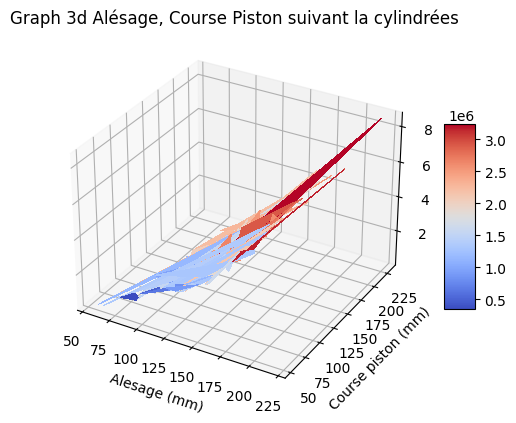

In [45]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Conversion de la colonne en matrice 2D
z = np.reshape(df['Cylindrées_cm^3_calc'].values, (4, -1))

# Création de la figure et des axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Tracé du graphique 3d
surf = ax.plot_surface(df['Alesage_mm'].values.reshape((4, -1)), 
                df['Course_Piston_mm'].values.reshape((4, -1)), 
                z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=6)
# Configuration de l'affichage
ax.set_xlabel('Alesage (mm)')
ax.set_ylabel('Course piston (mm)')
ax.set_title('Graph 3d Alésage, Course Piston suivant la cylindrées')